## Data Exploration and Cleaning 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta

In [9]:
df = pd.read_csv(r"C:\Users\sabri\Downloads\uber_data.csv")
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [10]:
df.shape

(6745, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [12]:
#rename columns for future convenience #make sure we are running on a copy 
df1 = df.rename(columns={
    'Request id': 'request_id',
    'Pickup point': 'pickup',
    'Driver id': 'driver_id',
    'Status': 'status',
    'Request timestamp': 'request',
    'Drop timestamp': 'drop'  
}).copy()
df1

,request_id,pickup,driver_id,status,request,drop
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [15]:
#convert 'Request timestamp' and 'Drop timestamp' to datetime dtype to force conditions later
#using the lambda function with apply method is a very effective way to clean and change rows
df1[['request', 'drop']] = df1[['request', 'drop']].apply(lambda x: pd.to_datetime(x))

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   request_id  6745 non-null   int64         
 1   pickup      6745 non-null   object        
 2   driver_id   4095 non-null   float64       
 3   status      6745 non-null   object        
 4   request     6745 non-null   datetime64[ns]
 5   drop        2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [17]:
df1.isnull().sum()

request_id       0
pickup           0
driver_id     2650
status           0
request          0
drop          3914
dtype: int64

In [18]:
df1.duplicated().any()

False

In [94]:
#deal with the peak request hour on the original df for later viz 
df['peak_request'] = df['Request timestamp'].apply(pd.to_datetime)

df['peak_request_hour'] = df['peak'].dt.hour

In [95]:
peak_hrs_value_counts = df['peak_request_hour'].value_counts()
peak_hrs_value_counts

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: peak_request_hour, dtype: int64

In [181]:
#deal with the no cars available status (hrs and week of days)
xx =df[df['Status'] =='No Cars Available']
xx['Request timestamp'] =xx['Request timestamp'].apply(pd.to_datetime)
xx['day'] = xx['Request timestamp'].dt.day_name()

C:\Users\sabri\AppData\Local\Temp\ipykernel_27552\2431881616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['Request timestamp'] =xx['Request timestamp'].apply(pd.to_datetime)
C:\Users\sabri\AppData\Local\Temp\ipykernel_27552\2431881616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['day'] = xx['Request timestamp'].dt.day_name()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,peak,peak_request_hour,peak_request,day
4095,1362,City,NaN,No Cars Available,2016-11-07 00:02:00,NaN,2016-11-07 00:02:00,0,2016-11-07 00:02:00,Monday
4096,1364,City,NaN,No Cars Available,2016-11-07 00:06:00,NaN,2016-11-07 00:06:00,0,2016-11-07 00:06:00,Monday
4097,1366,City,NaN,No Cars Available,2016-11-07 00:09:00,NaN,2016-11-07 00:09:00,0,2016-11-07 00:09:00,Monday
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaN,2016-11-07 00:23:00,0,2016-11-07 00:23:00,Monday
4099,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaN,2016-11-07 00:30:00,0,2016-11-07 00:30:00,Monday
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaN,2016-07-15 23:49:03,23,2016-07-15 23:49:03,Friday
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaN,2016-07-15 23:50:05,23,2016-07-15 23:50:05,Friday
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaN,2016-07-15 23:52:06,23,2016-07-15 23:52:06,Friday
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaN,2016-07-15 23:54:39,23,2016-07-15 23:54:39,Friday


## Feature Engineering 

In [19]:
#create a new 'driving time' col to return driving time 
df1['driving_time'] = df1['drop'] - df1['request']
df1

,request_id,pickup,driver_id,status,request,drop,driving_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,0 days 00:52:31
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,NaT


In [20]:
#create a 'total_minutes' col to store total minutes info from driving time 

df1 = df1.dropna(subset=['drop', 'driving_time']) #drop values in the cols which cannot be filled 

df1['total_minutes'] = (df1['driving_time'].dt.total_seconds()/60).astype(int) #make the values int

df1

C:\Users\sabri\AppData\Local\Temp\ipykernel_27552\3133882999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_minutes'] = (df1['driving_time'].dt.total_seconds()/60).astype(int) #make the values int


,request_id,pickup,driver_id,status,request,drop,driving_time,total_minutes
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00,69
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00,50
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00,41
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00,55
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,0 days 00:52:31,52
...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,0 days 00:41:00,41
2827,2924,City,300.0,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52,0 days 00:49:30,49
2828,3324,Airport,300.0,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03,0 days 00:42:42,42
2829,3935,Airport,300.0,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13,0 days 01:17:05,77


In [21]:
#some of the drop data doesnt match up with request #select only the valid ttl minutes (minutes >0)
df1 = df1[(df1['total_minutes'] < 180) & (df1['total_minutes'] > 0)]
df1

,request_id,pickup,driver_id,status,request,drop,driving_time,total_minutes
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00,69
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00,50
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00,41
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00,55
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,0 days 00:52:31,52
...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,0 days 00:41:00,41
2827,2924,City,300.0,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52,0 days 00:49:30,49
2828,3324,Airport,300.0,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03,0 days 00:42:42,42
2829,3935,Airport,300.0,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13,0 days 01:17:05,77


In [22]:
#deal with the hours #create a 'peak_hour' col to store the hour info from 'request'
df1['peak_hour'] = df1['request'].dt.hour
df1
#but later found out df1 removed some status cancelled or no cars available rows already
#so when vizualising peak hrs, we have to use the original df

C:\Users\sabri\AppData\Local\Temp\ipykernel_27552\4195585457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['peak_hour'] = df1['request'].dt.hour


,request_id,pickup,driver_id,status,request,drop,driving_time,total_minutes,peak_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00,69,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00,50,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00,41,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00,55,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,0 days 00:52:31,52,8
...,...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,0 days 00:41:00,41,22
2827,2924,City,300.0,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52,0 days 00:49:30,49,6
2828,3324,Airport,300.0,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03,0 days 00:42:42,42,12
2829,3935,Airport,300.0,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13,0 days 01:17:05,77,22


In [142]:
#week of day 
df1['day'] = df1['request'].dt.day_name()

C:\Users\sabri\AppData\Local\Temp\ipykernel_27552\4022768137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = df1['request'].dt.day_name()


## Insights Extraction 

### Pickup sites

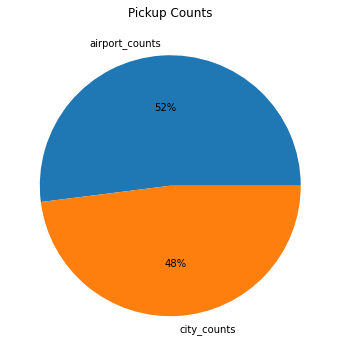

In [52]:
plt.figure(figsize=(10,6))

# Get the value counts for the 'pickup' column
airport_counts = df['Pickup point'].value_counts()
city_counts = df['Pickup point'].value_counts()

labels = ['airport_counts', 'city_counts']
# Create a pie chart of the counts
plt.pie(airport_counts.values, labels = labels, autopct='%1.0f%%')

plt.title('Pickup Counts')

plt.show()

### Trip status

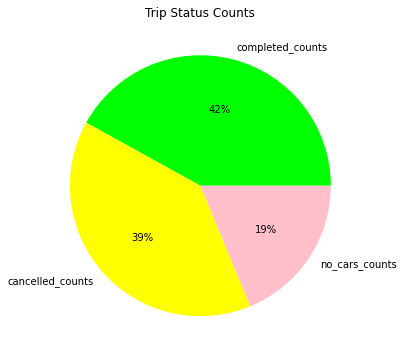

In [51]:
plt.figure(figsize=(10,6))
# Get the value counts for the 'Status' column
completed_counts = df['Status'].value_counts()
cancelled_counts = df['Status'].value_counts()
no_cars_counts = df['Status'].value_counts()

labels = ['completed_counts', 'cancelled_counts', 'no_cars_counts']

colors = ['#00FF00', '#FFFF00', '#FFC0CB']

plt.pie(completed_counts.values, labels = labels, colors = colors, autopct='%1.0f%%')

plt.title('Trip Status Counts')

plt.show()

### Pickup sites vs. trip status

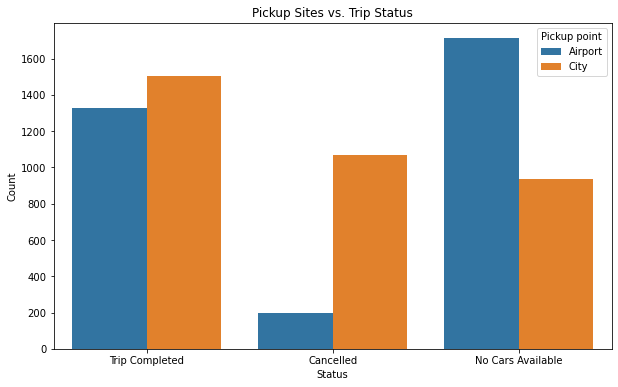

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x="Status", hue='Pickup point') #hue: group the data by variable
plt.title('Pickup Sites vs. Trip Status')
plt.xlabel("Status")
plt.ylabel('Count')
plt.show()

### Summary 1) Airport often does not have cars available compared to city 
### Summary 2) Trips are often cancelled in city compared to airport 

### Total driving minutes 

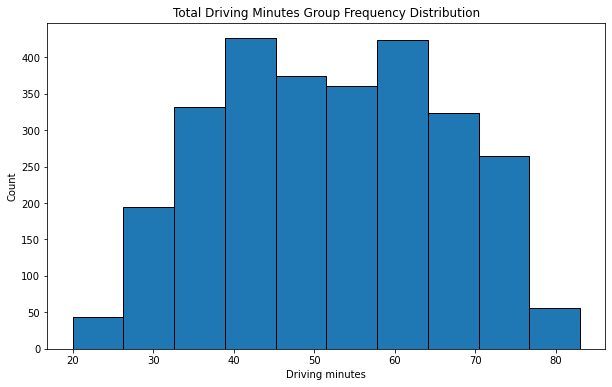

In [147]:
plt.figure(figsize=(10,6))

plt.hist(df1['total_minutes'], bins=10, edgecolor='black')

plt.title('Total Driving Minutes Group Frequency Distribution')
plt.xlabel('Driving minutes')
plt.ylabel('Count')
plt.show()

### Peak request hrs 

Text(0, 0.5, 'Count')

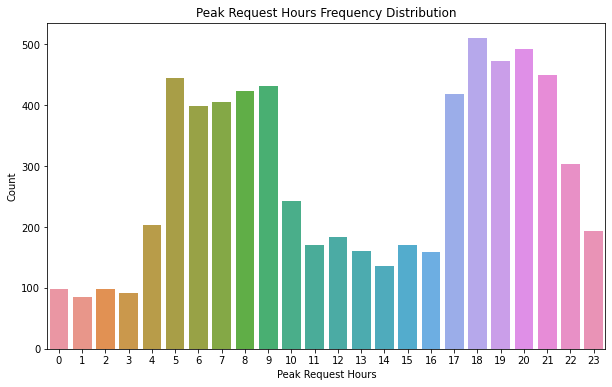

In [146]:
plt.figure(figsize=(10,6))
sns.barplot(x = peak_hrs_value_counts.index, y = peak_hrs_value_counts.values)
plt.title('Peak Request Hours Frequency Distribution')
plt.xlabel('Peak Request Hours')
plt.ylabel('Count')

### Summary 3) The peak demand for uber from occurs between 18.00 to 21.00, followed by 5-9 am 


### Peak request day of week

(array([ 582.,    0.,    0., 1126.,    0.,    0.,  530.,    0.,    0.,
         561.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

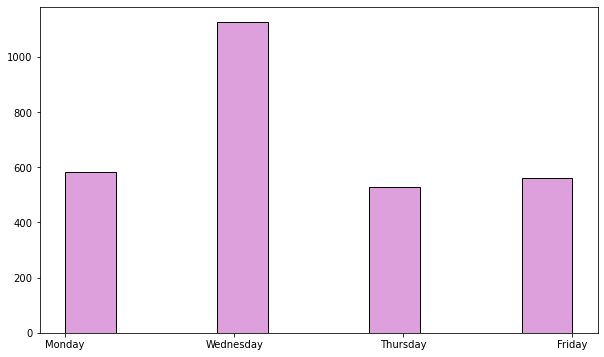

In [153]:
plt.figure(figsize=(10, 6))
plt.hist(df1['day'], bins=10, edgecolor='black', color= 'plum')

### Summary 4) Wednesdays have the highest driving request 

### No cars available hours 

Text(0, 0.5, 'Count')

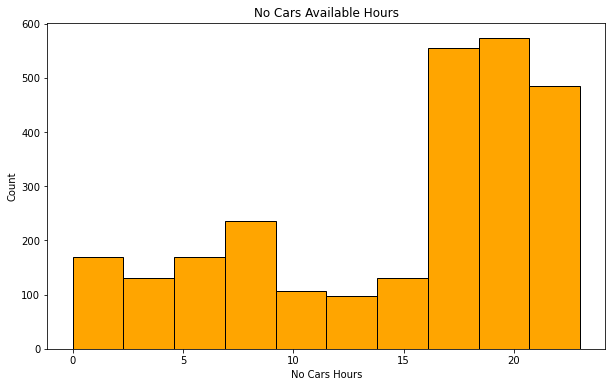

In [145]:
plt.figure(figsize=(10,6))
plt.hist(xx['peak_request_hour'], bins=10, edgecolor='black', color= 'orange')
plt.title('No Cars Available Hours')
plt.xlabel('No Cars Hours')
plt.ylabel('Count')

### Summary 5) 18.00 to 21.00 has the highest driving request but often there are no cars available during this time period


### No cars available day of week 

Text(0, 0.5, 'Count')

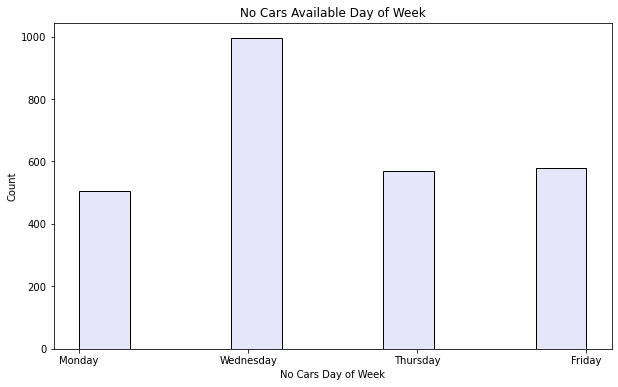

In [183]:
plt.figure(figsize=(10, 6))
plt.hist(xx['day'], bins=10, edgecolor='black', color = 'lavender')
plt.title('No Cars Available Day of Week')
plt.xlabel('No Cars Day of Week')
plt.ylabel('Count')

### Summary 6) There are most driving request on Wednesdays, but there are often no cars available (almost 1.2k driving requests on Wednesdays but 1k are not available